In [1]:
import pandas as pd
import numpy as np

In [7]:
data_list=[]
for i in range(78):
    temp = pd.read_csv(f'./data_split/{i+1}.csv')
    temp['rms'] = np.sqrt((temp['x']/temp['x'].mean())**2+(temp['y']/temp['y'].mean())**2+(temp['z']/temp['z'].mean())**2)
    data_list.append(temp) if len(temp)>1000 else print(i,len(temp))
len(data_list)

69 0


77

In [8]:
for dataframe in data_list:
    print(len(dataframe),end=" ")

10994 8857 152781 14885 15319 11257 16021 14578 14809 14584 15711 13598 11107 15758 15713 15641 14633 13480 14125 14720 12757 15479 15584 13568 11504 9907 5668 8557 22858 25192 14432 26862 7378 8332 7428 150226 7200 9496 5721 10996 9937 9214 12263 9960 9577 7768 3429 7463 6953 8103 5533 7046 6114 15396 10232 5197 2660 3609 3622 5699 4949 3620 6172 5457 4681 7920 9945 12428 7859 4957 5661 7235 15376 9803 8914 14177 19258 

가정 1: 이상 탐지 라벨링은 각각 tool에 대하여 각각 이상치로 한다.

각 과정마다 

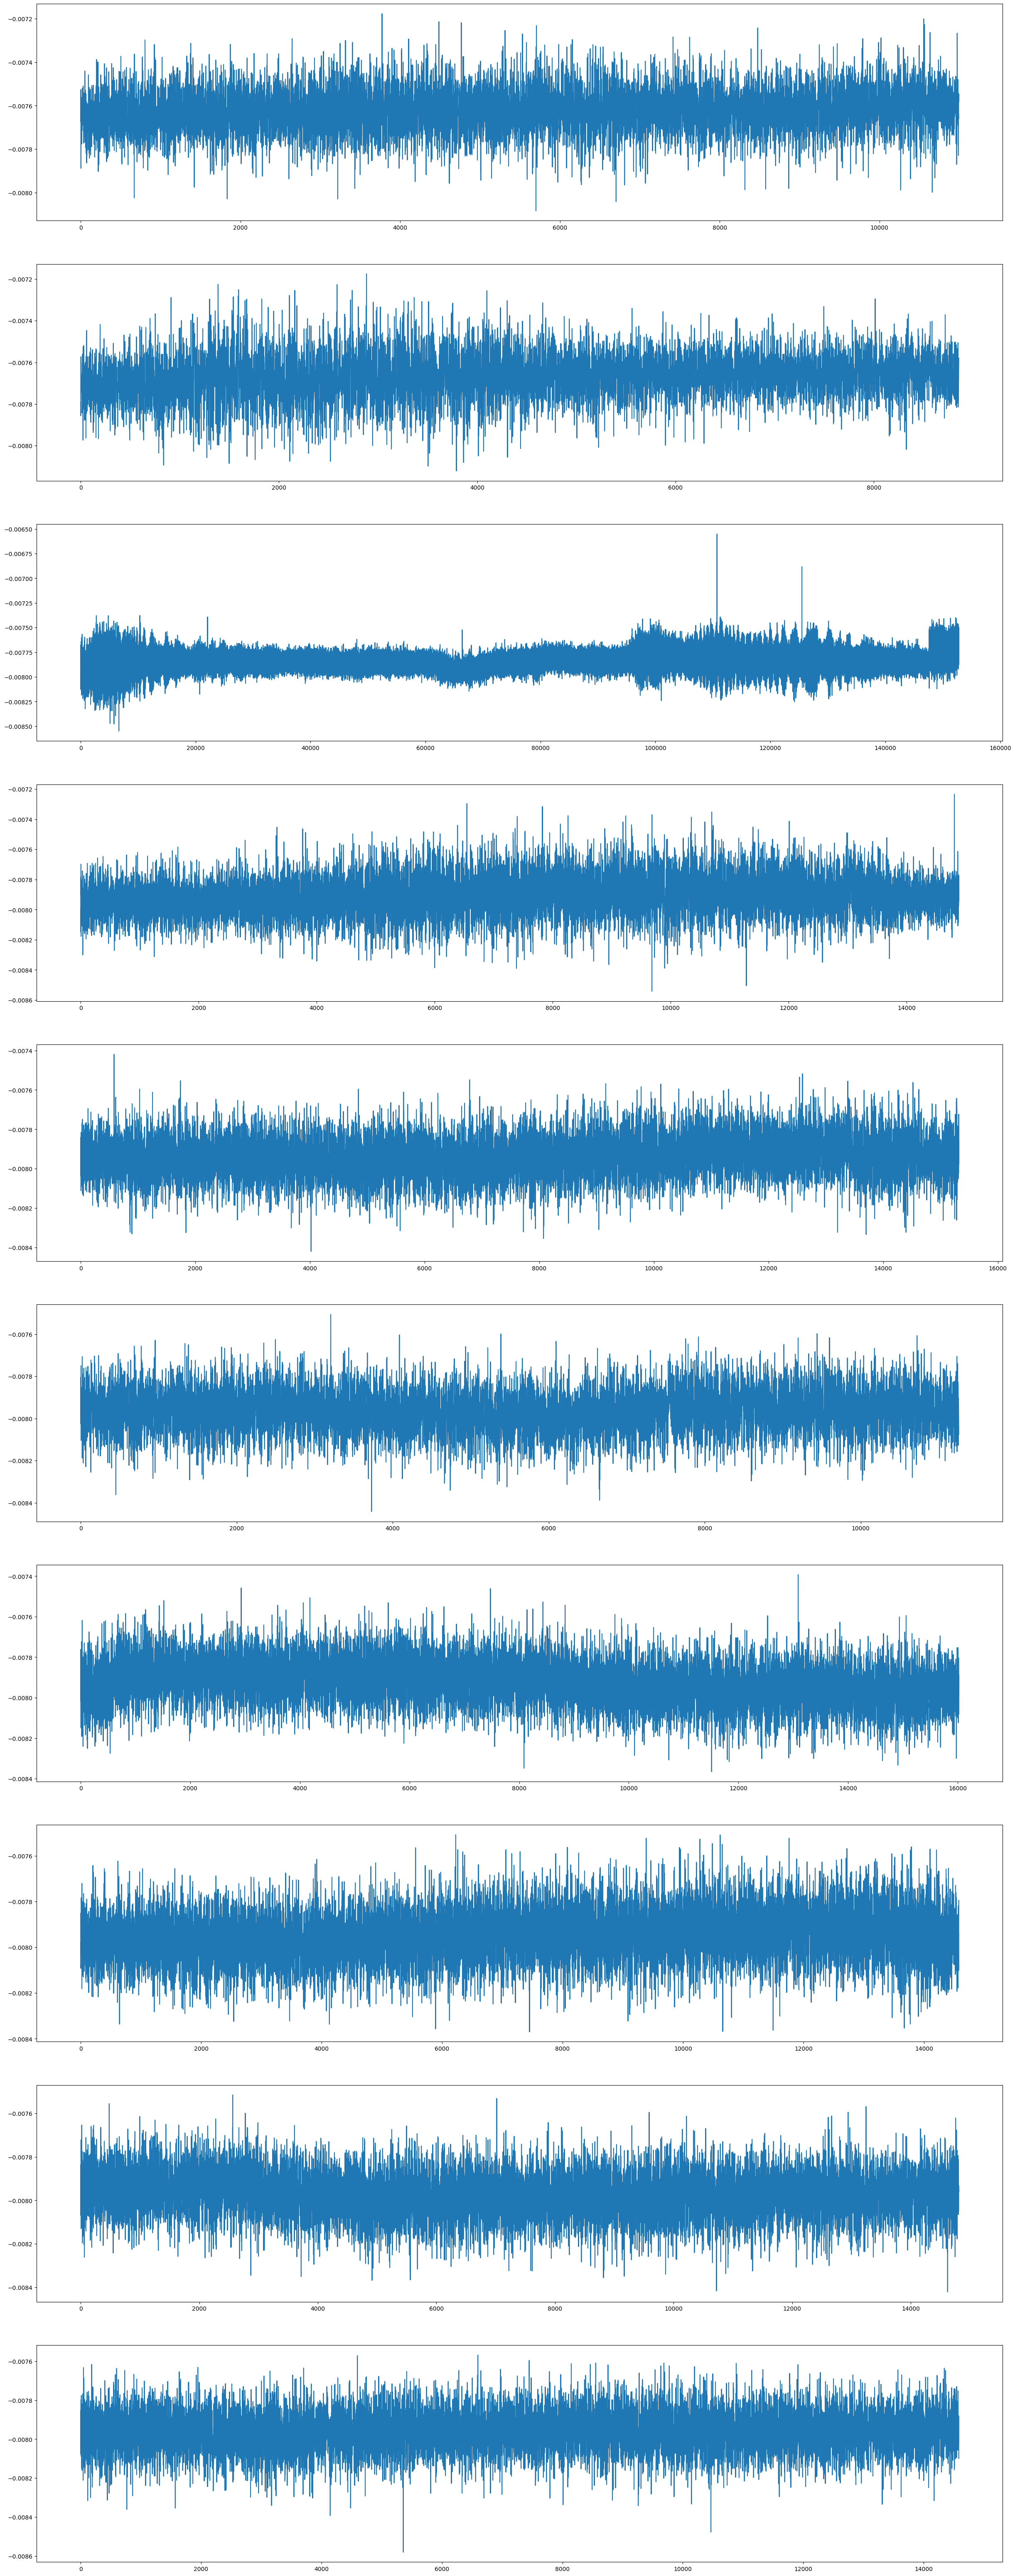

In [28]:
n=10
import matplotlib.pyplot as plt
plt.figure(figsize=(30,80))
for i in range(n):
    plt.subplot(n,1,i+1)
    plt.plot(data_list[i][['x']])

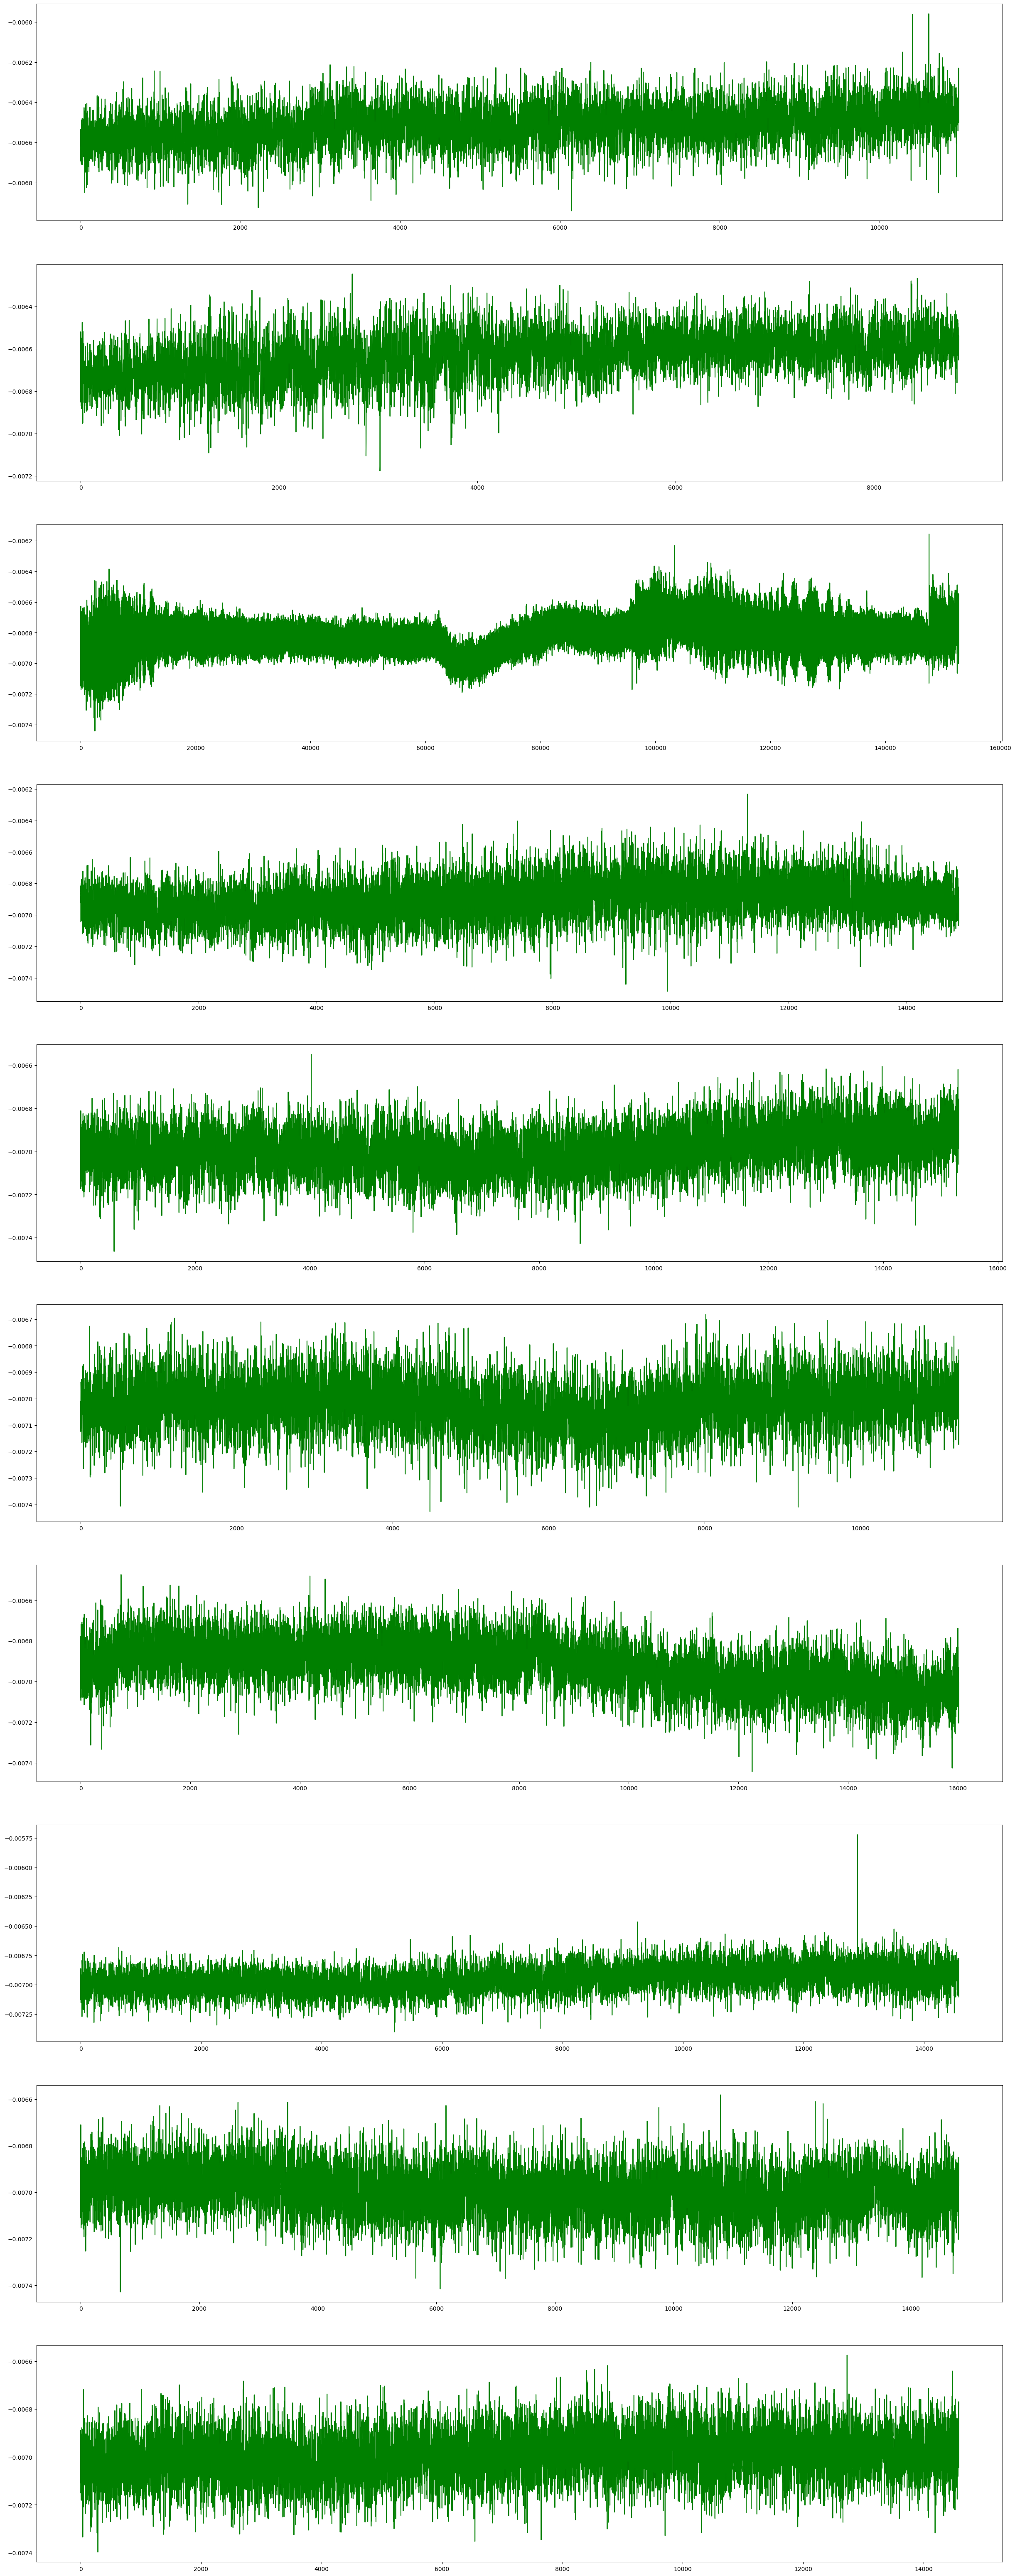

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,80))
for i in range(n):
    plt.subplot(n,1,i+1)
    plt.plot(data_list[i][['y']],'g')

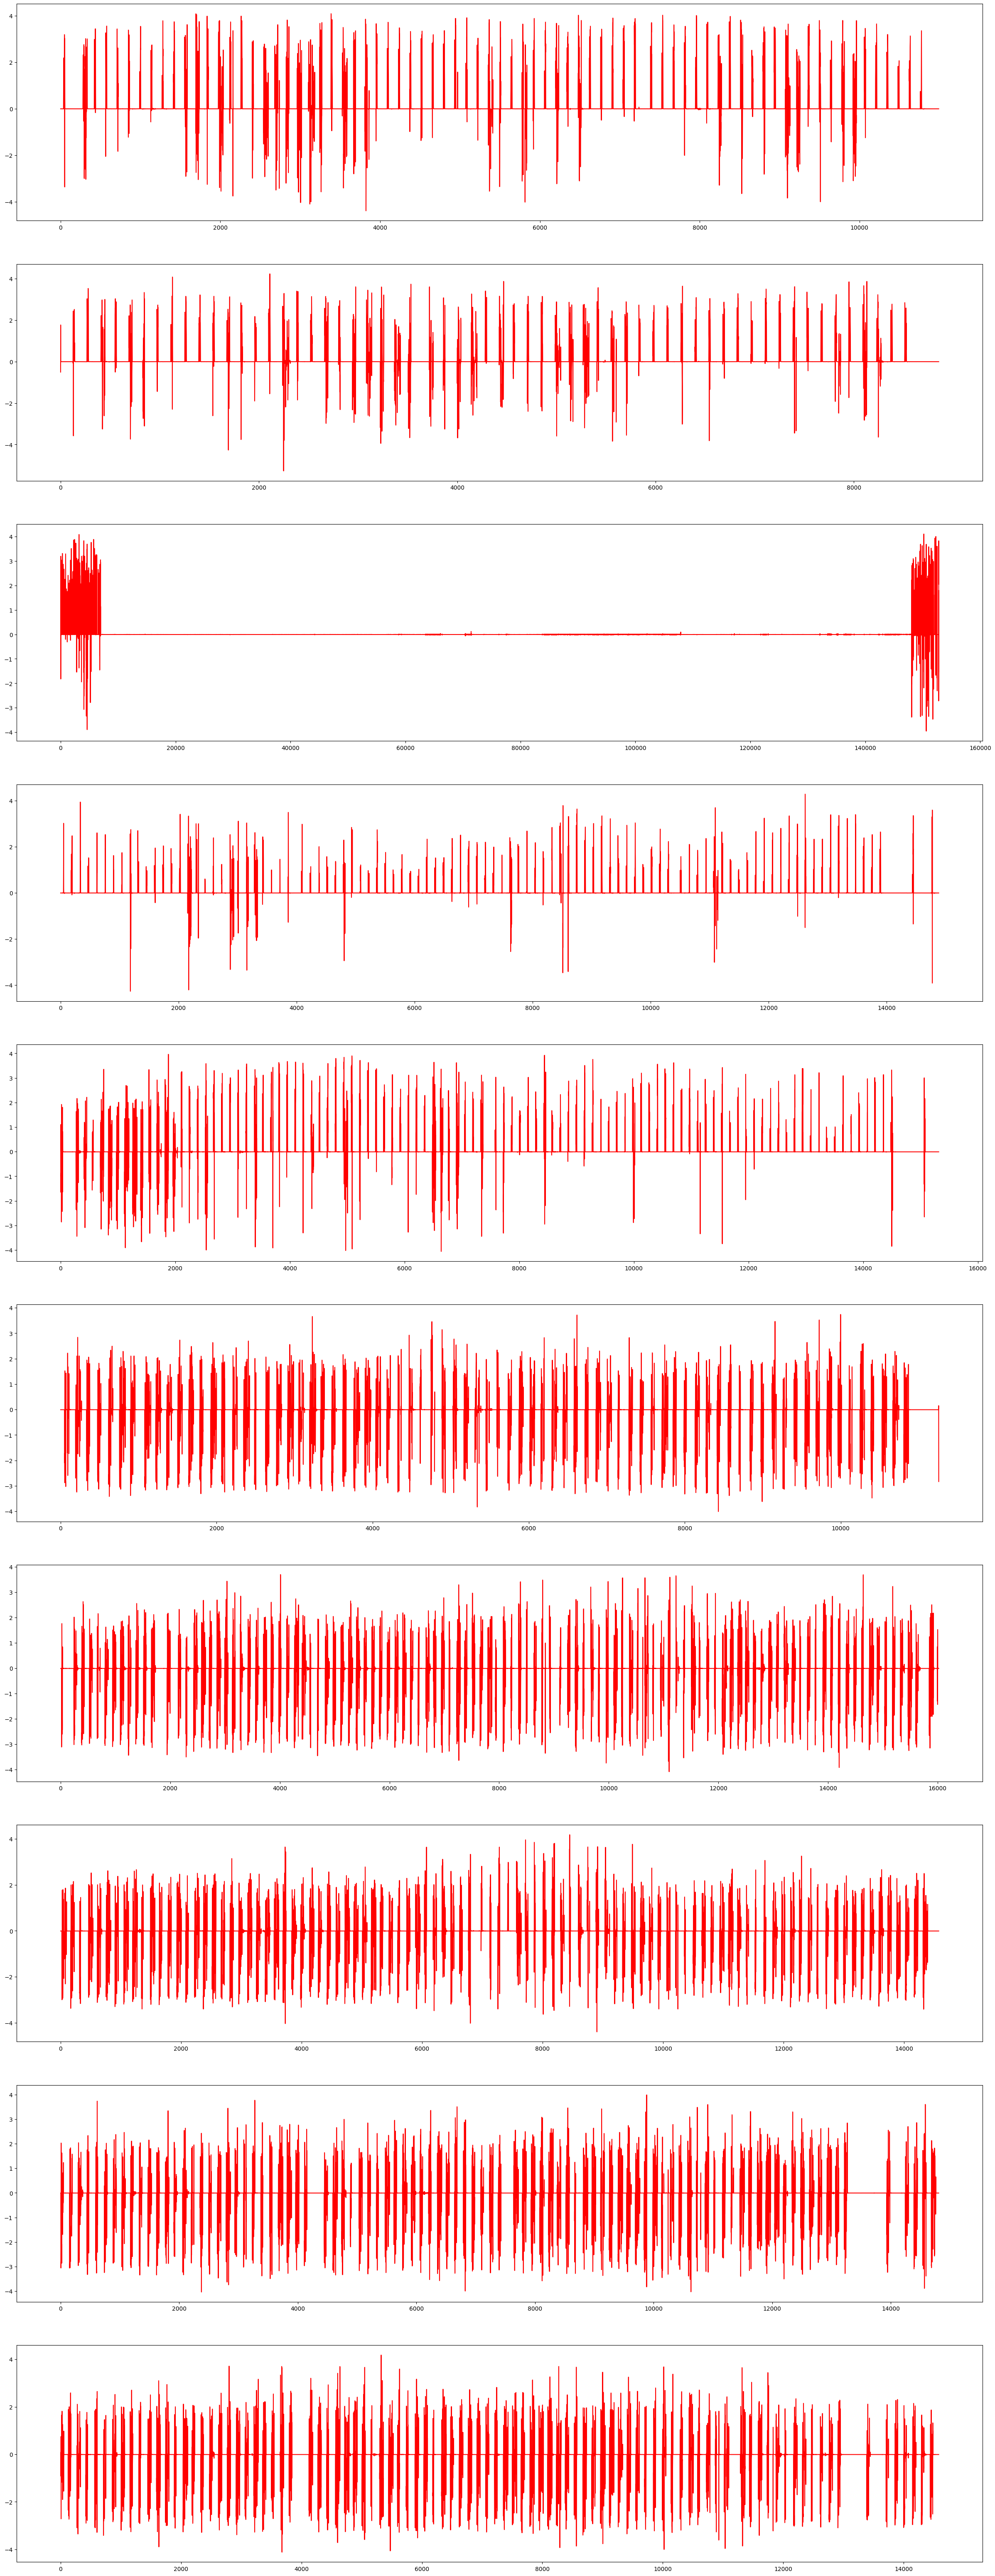

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,80))
for i in range(n):
    plt.subplot(n,1,i+1)
    plt.plot(data_list[i][['z']],'r')

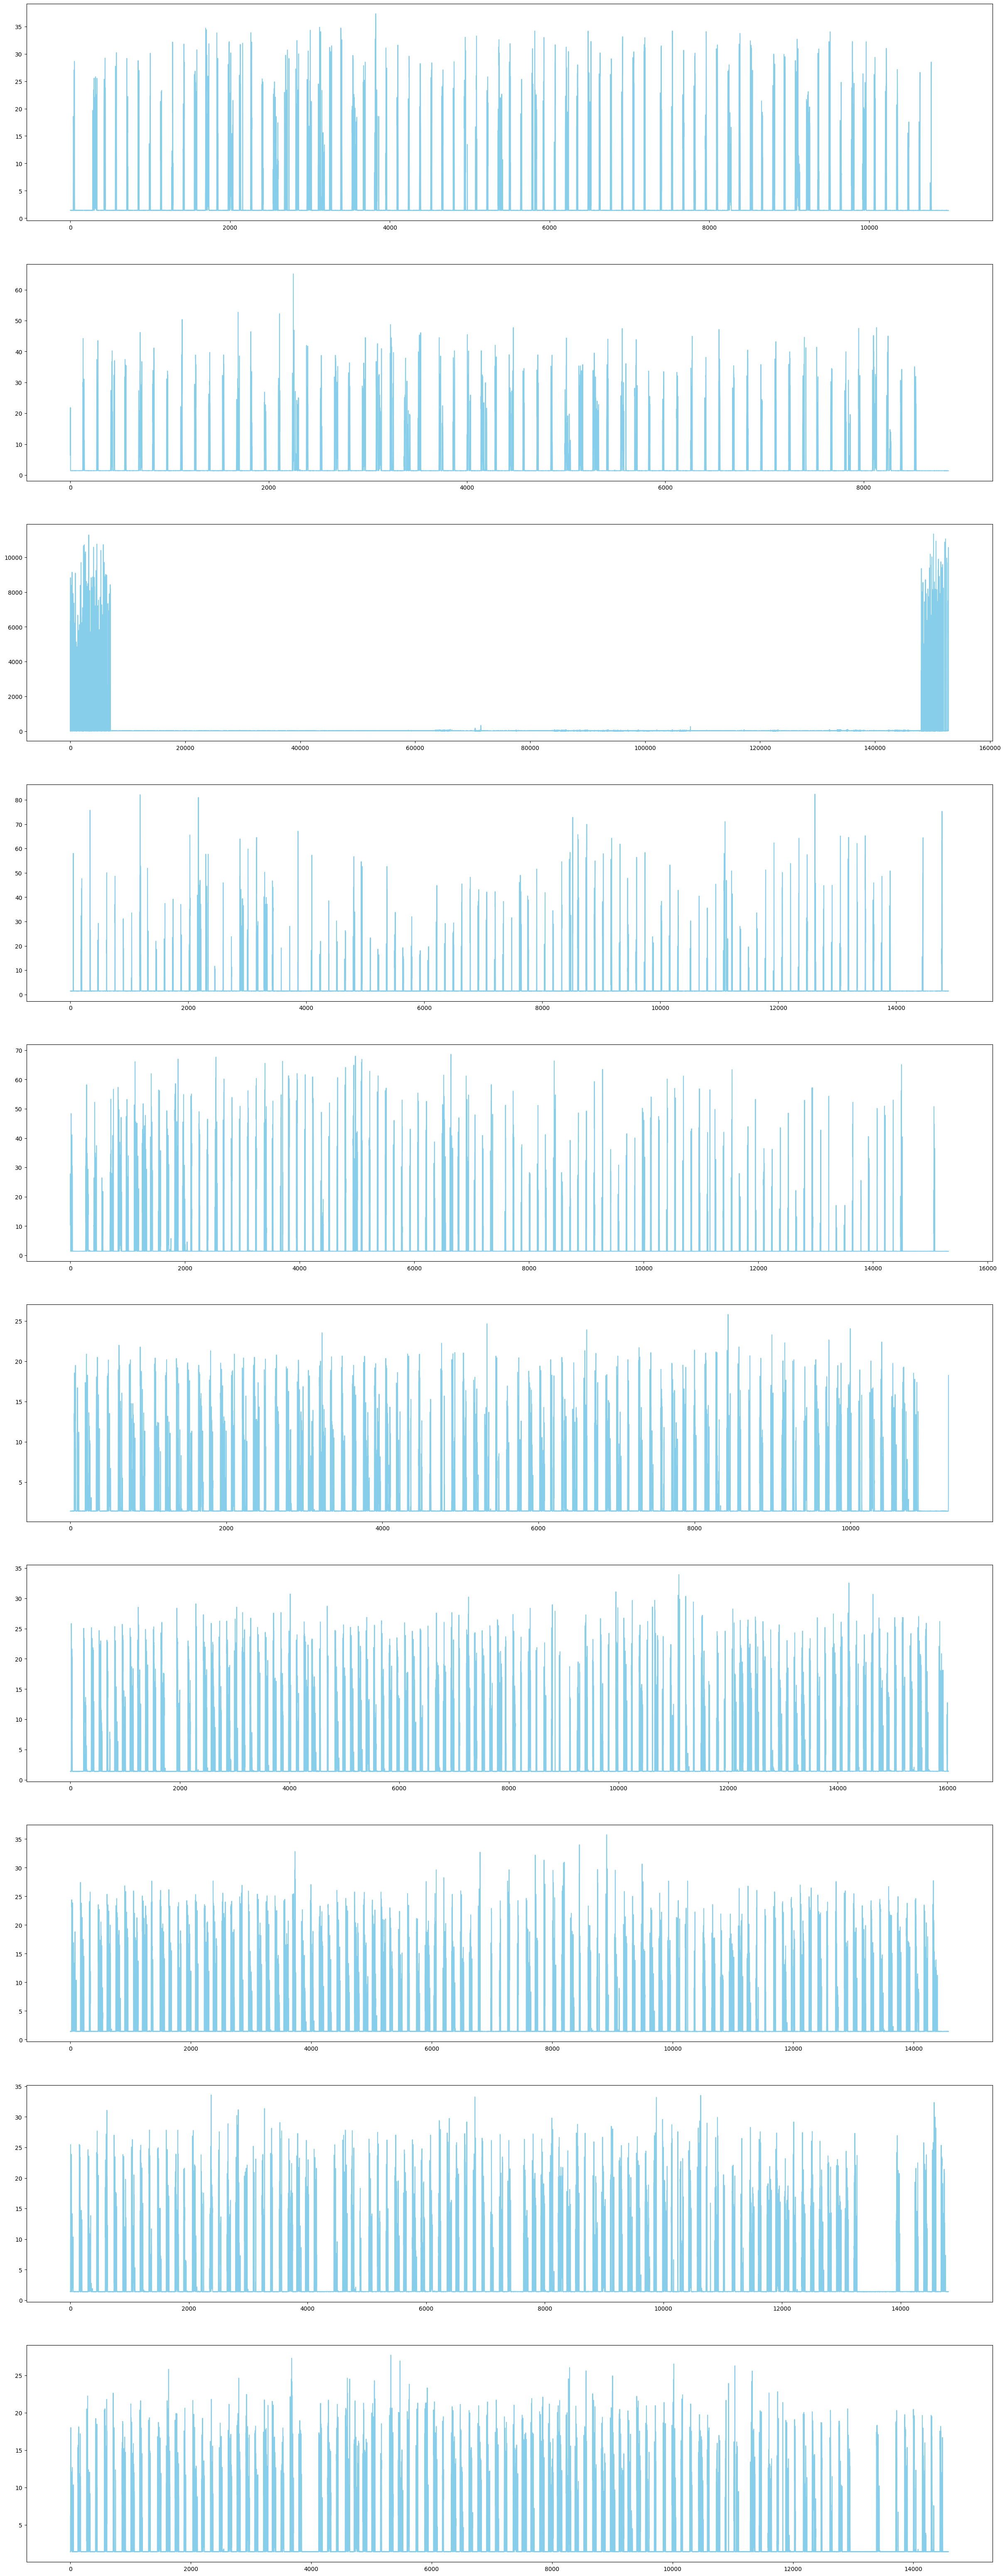

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,80))
for i in range(n):
    plt.subplot(n,1,i+1)
    plt.plot(data_list[i][['rms']],'skyblue')

데이터 특성이 게속 바뀜에 따라 한번에 적용할 수는 없을듯?


In [32]:
tool = pd.read_csv('./tool.csv')

<Axes: >

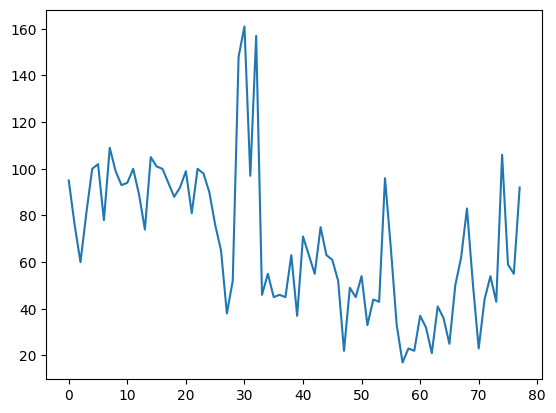

In [14]:
tool['개수'].plot()

### 가정 2. max 와 min 비교하기

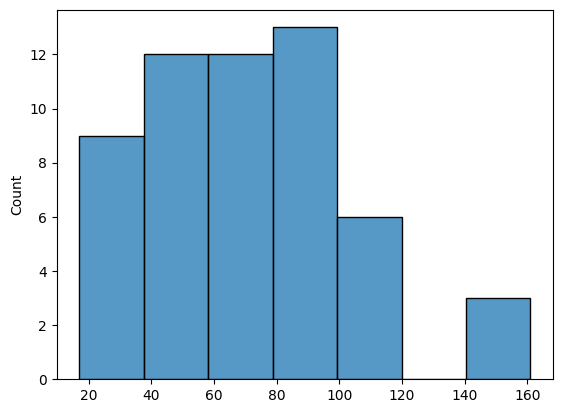

In [15]:
import seaborn as sns
t = pd.DataFrame(tool['개수'].value_counts().sort_index())
t.reset_index(inplace=True)
t.rename(columns={'개수': None},inplace=True)
t.set_index(None,drop=True,inplace=True)
sns.histplot(t,x=t.index);

In [16]:
max_index= tool[tool['개수']==tool['개수'].max()].index[0]
min_index= tool[tool['개수']==tool['개수'].min()].index[0]

max

In [17]:
Max = data_list[max_index]

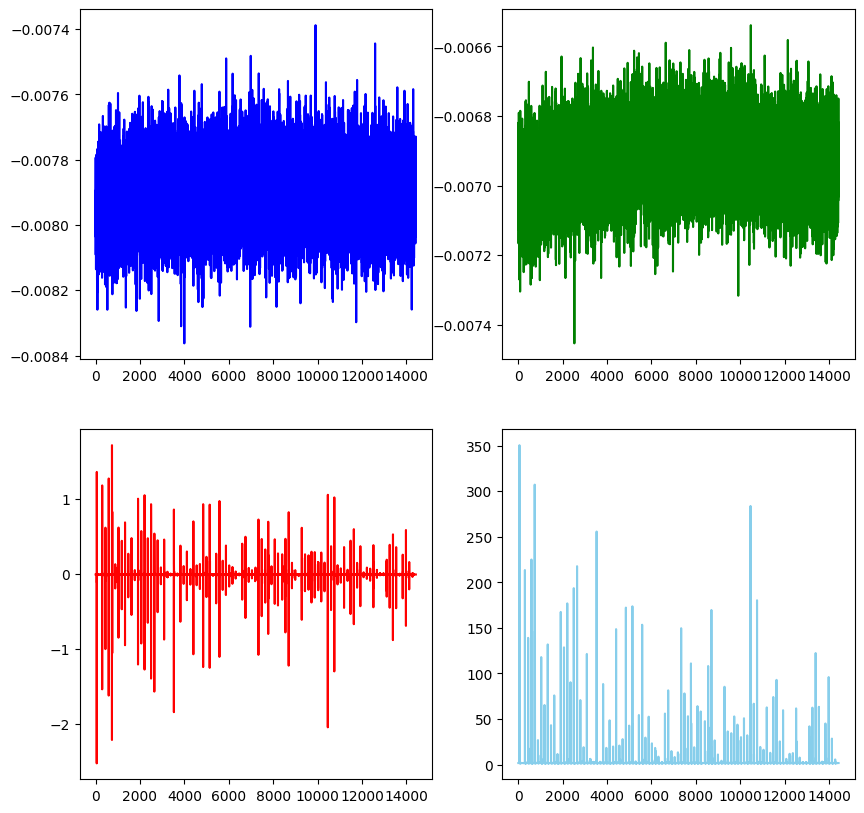

In [18]:
plt.figure(figsize=(10,10))
for i,(column,color) in enumerate(zip(['x','y','z','rms'],['b','g','r','skyblue'])):
    plt.subplot(2,2,i+1)
    plt.plot(Max[column],color)

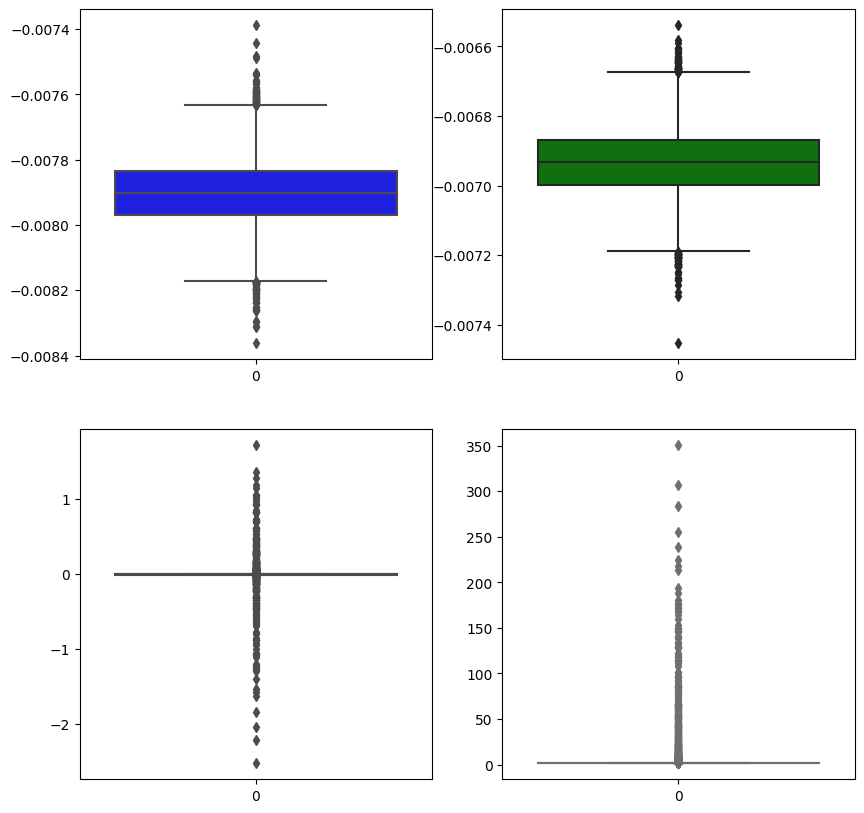

In [19]:

plt.figure(figsize=(10,10))
for i,(column,color) in enumerate(zip(['x','y','z','rms'],['b','g','r','skyblue'])):
    plt.subplot(2,2,i+1) if i!=2 else plt.subplot(2,2,i+1)
    sns.boxplot(Max[column],color=color)

min

In [20]:
Min = data_list[min_index]

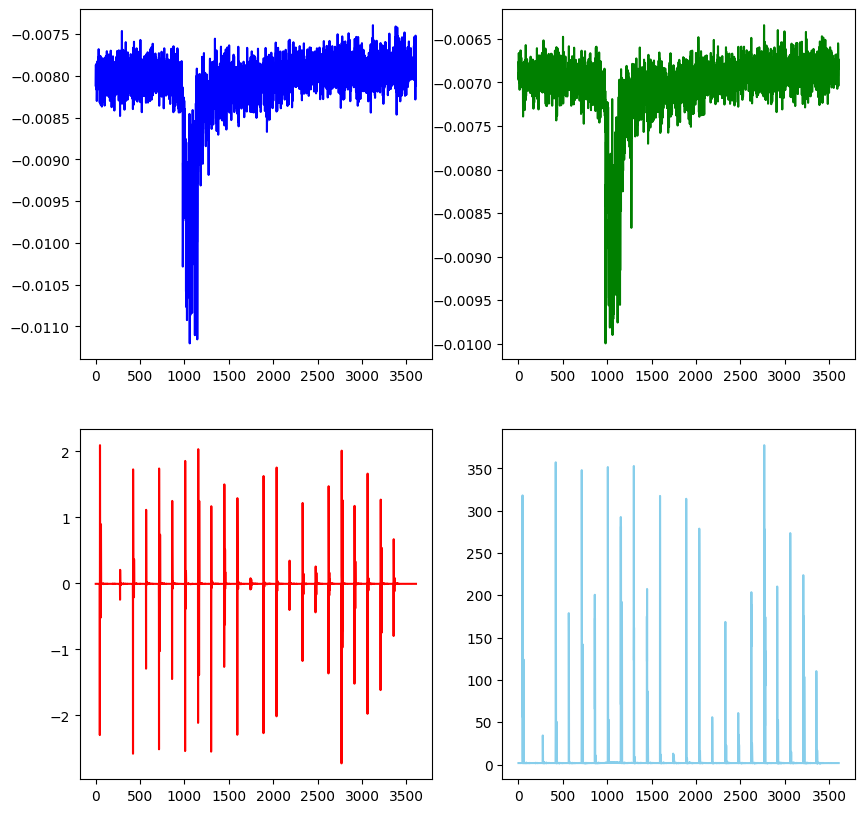

In [21]:
plt.figure(figsize=(10,10))
for i,(column,color) in enumerate(zip(['x','y','z','rms'],['b','g','r','skyblue'])):
    plt.subplot(2,2,i+1)
    plt.plot(Min[column].iloc[:],color)

In [22]:
print(len(Max),len(Min))

14432 3609


코멘트

1. 과연 이렇게 이상영역을 정의하는 것이 무엇을 의미하는가? 

이렇게 정의하면 과연 인공지능 모델이 필요한가??? -> 라벨링이 잘 된다면 이는 통계모델로 끝나는 일!!!!

2. 정의한 것이 올바른가???? 즉, 이상탐지가 고장유무와 직접적으로 연결되는가 

연결을 되지만 일대일 대응, 무조건적인 인과관계가 아니라고 본다. 진동 데이터는 센서 특성 및 부착 위치 특성으로 인하여 외부 환경에 많이 받는다. 

특히 만약에 작업 공간에 많은 장비, 진동을 유발하는 장비가 많은 경우 vibration isolation table이 아니면 공진 현상이 무조건 발생한다. 그에 대한 영향을 고려하지 않은 가운데 이를 기반으로 한다면 이는 매우 위험 할 수도 있다. 


------------------------------------------------------

교체 주기 관련 데이터는 Z축과 관련이 있다. 

의문점 

1. 왜 z축 vibration은 왜이리 튀는 값이 많은가?

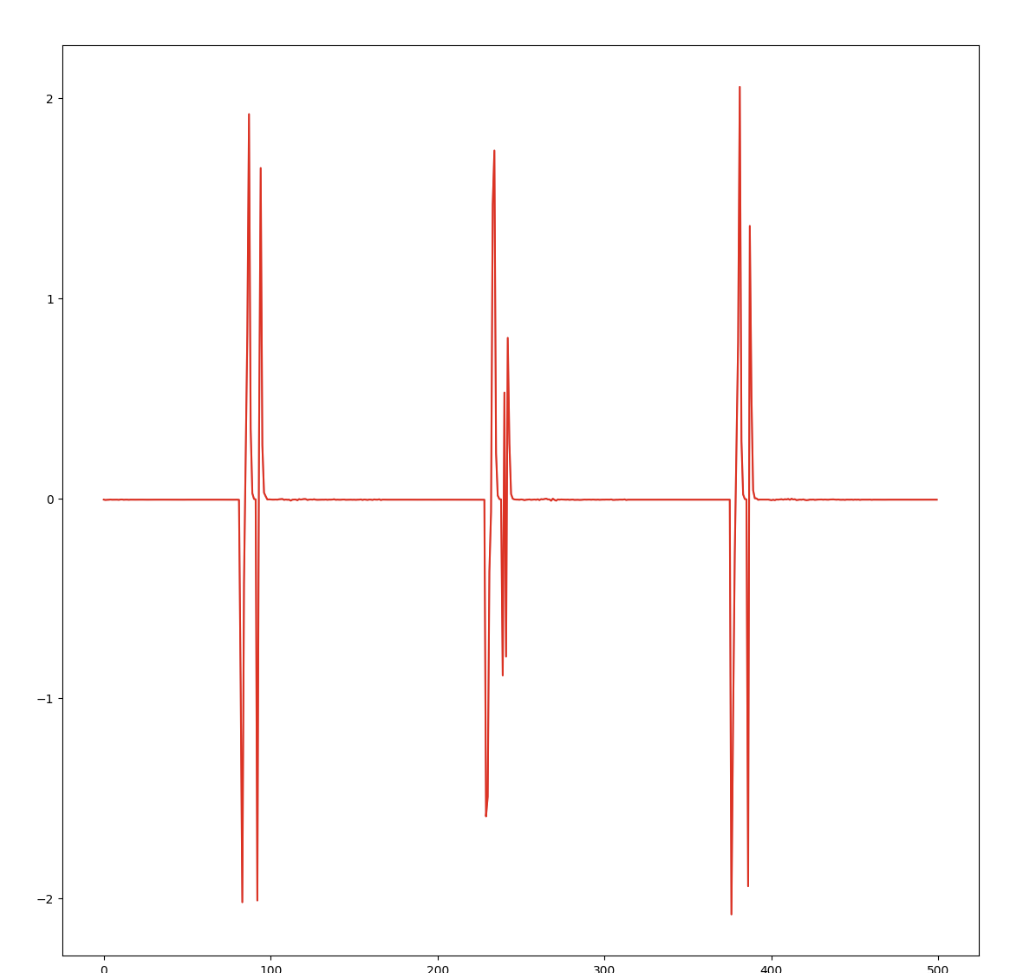

튄다기보다 pulse 느낌이다.

https://chasuyeon.tistory.com/14

질문 

1. 압축을 어떻게 하였나 대표값인가 아니면 평균인가 

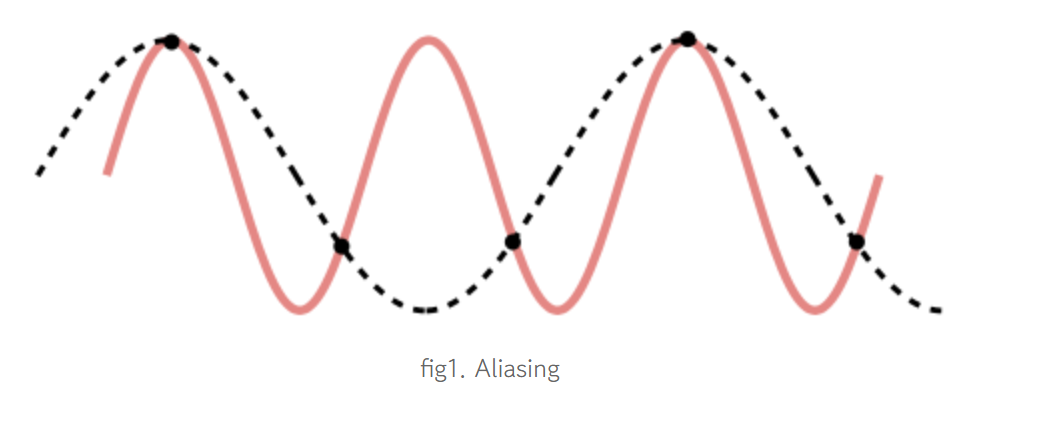

2. 대표값인 경우

   이는 해상도를 낮추었다고 생각하고 시계열 데이터 사용가능

3. 평균인 경우

   평균으로 하는 경우 데이터 손싦 및 왜곡이 심각하게 발생할 가능성 !!!! 

### 가정

1. 100보다 작은 경우는 결함이 있다고 판단하고 , 100보다 큰 경우는 결함이 없다고 판단하여 둘의 차이점을 찾아 이를 기준으로 하기

2. 100보다 큰 부분에서는 무조건 결함이 있다고 판단하기

3. 시계열 예측을 진행하고 예측 데이터와 실제 데이터간의 차이를 기준으로 thresold 적용하여 이 이상은 이상으로 탐지하기

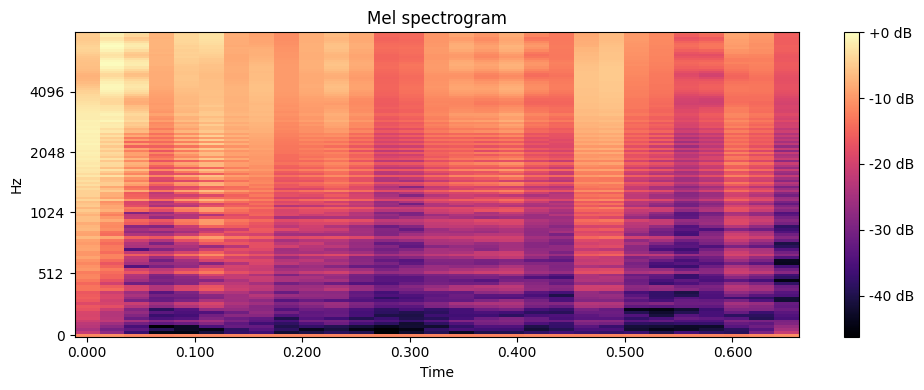

In [37]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
# Mel spectrogram 계산
Max.index=Max['Time']
S = librosa.feature.melspectrogram(y=Max['z'].to_numpy(), n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')

plt.tight_layout()
plt.show()

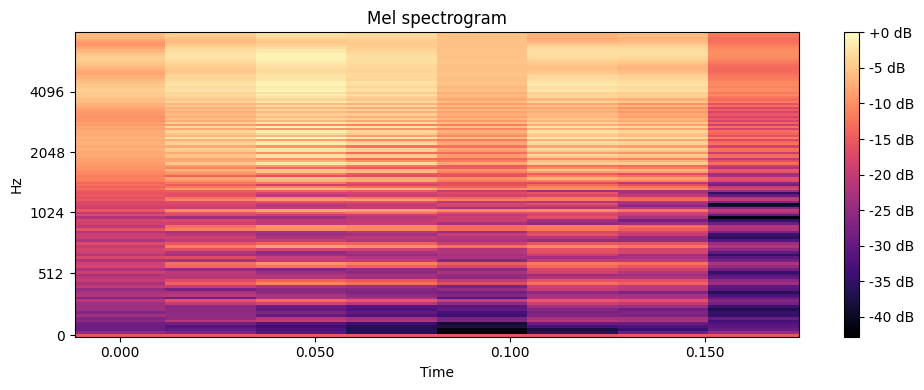

In [48]:
# Mel spectrogram 계산
Min.index=Min['Time']
S = librosa.feature.melspectrogram(y=Min['z'].to_numpy(), n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()